Summary Statistics:
                         Standard Deviation      Variance  25th Percentile  \
serial                        7.261767e+03  5.273326e+07           6288.5   
price                         1.057051e+08  1.117358e+16         785000.0   
GrossSquareMeters             1.010896e+02  1.021910e+04             95.0   
BuildingAge                   7.753730e+00  6.012032e+01              0.0   
NumberFloorsofBuilding        6.952397e+00  4.833582e+01              4.0   

                        50th Percentile (Median)  75th Percentile  
serial                                   12577.0          18865.5  
price                                  1350000.0        2850000.0  
GrossSquareMeters                          120.0            170.0  
BuildingAge                                  7.5             13.0  
NumberFloorsofBuilding                       5.0              8.0  


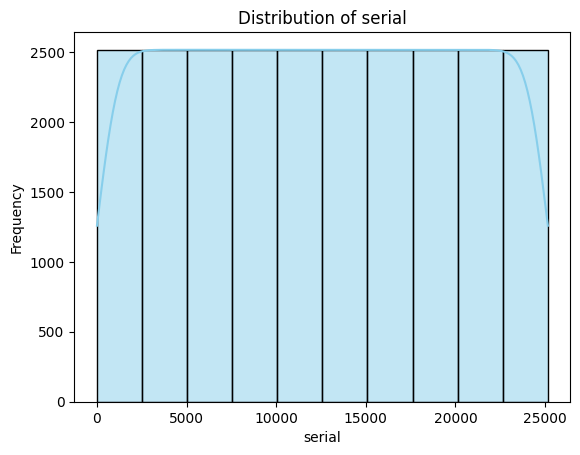

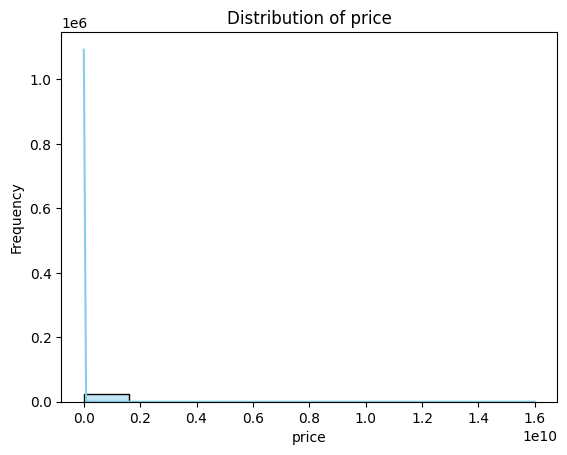

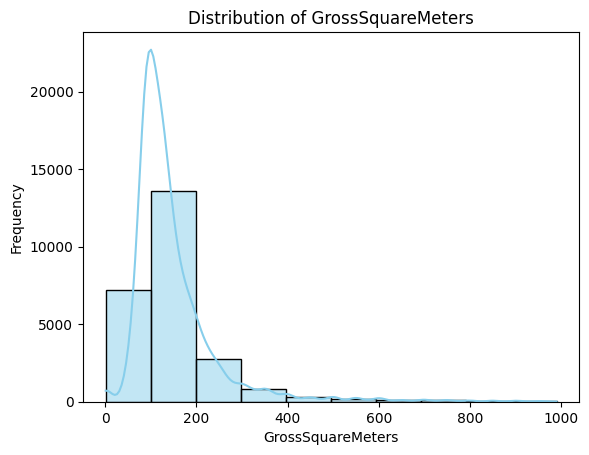

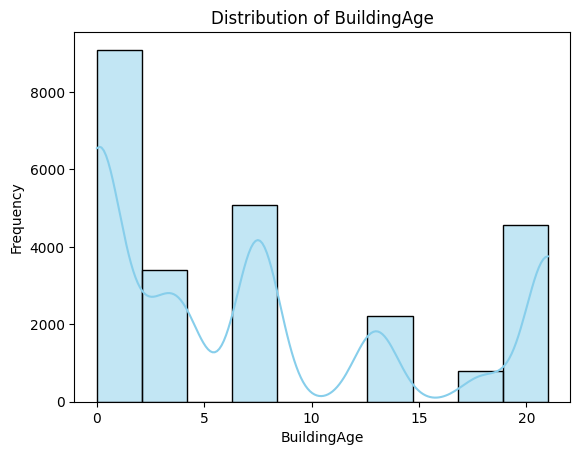

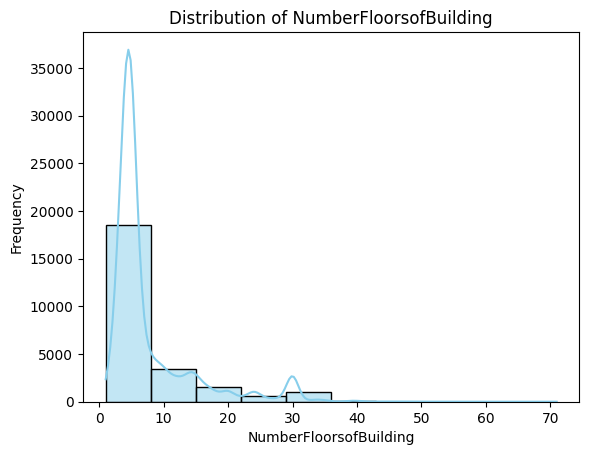

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "D://DSML PRACTICAL//Datasets//House Data.csv"
df = pd.read_csv(file_path)

# Step 1: Clean the "price" column by removing non-numeric characters and converting to float
# df=df.loc[df["price"]!='34550000arrow_downward%3']
df["price"] = df["price"].str.replace("TL", "").str.replace(",", "").str.extract(r'(\d+)')[0].astype(float)
unique_values = df["price"].unique()



# Step 2: Clean the "GrossSquareMeters" column by removing "m2" and converting to float
df["GrossSquareMeters"] = df["GrossSquareMeters"].str.replace(" m2", "").astype(float)

# Step 3: Convert "BuildingAge" into numeric values
df["BuildingAge"] = df["BuildingAge"].replace({"21 Ve Üzeri": 21, "5-10": 7.5, "11-15": 13, "0 (Yeni)": 0,"16-20": 18, "20 Ve Üzeri":20}).astype(float)

# Handle missing values (fill with median for numeric columns)
df.fillna(df.mean(numeric_only=True), inplace=True)

# Step 4: Compute Statistical Measures (Standard Deviation, Variance, Percentiles)
stats = {
    "Standard Deviation": df.std(numeric_only=True),
    "Variance": df.var(numeric_only=True),
    "25th Percentile": df.quantile(0.25, numeric_only=True),
    "50th Percentile (Median)": df.median(numeric_only=True),
    "75th Percentile": df.quantile(0.75, numeric_only=True),
}

stats_df = pd.DataFrame(stats)
print("Summary Statistics:\n", stats_df)

# Step 5: Create Histograms for numeric columns
for column in df.select_dtypes(include=[float, int]).columns:
    plt.figure()
    sns.histplot(df[column], kde=True, bins=10, color="skyblue")
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()
